In [1]:
# libraries
# %matplotlib notebook
import os
import pandas as pd
import numpy as np
import json

import matplotlib
import seaborn
import matplotlib.dates as md
from matplotlib import pyplot as plt

In [2]:
data = {}
path = './../NAB/data/'

def addFolderAndReadAll(f_name):
    data[f_name] = {}
    csvs = os.listdir(path + '/' + f_name)
    csvs_num = 0
    for csv in csvs:
        data[f_name][csv] = pd.read_csv(path + '/' + f_name + '/' + csv)
        csvs_num += 1
    return csvs_num

csvs_num = sum([addFolderAndReadAll(f_name) for f_name in os.listdir(path) if os.path.isdir(path + f_name)])

In [6]:
data['artificialWithAnomaly']['art_daily_nojump.csv']

,timestamp,value
0,2014-04-01 00:00:00,21.598011
1,2014-04-01 00:05:00,19.321392
2,2014-04-01 00:10:00,21.399938
3,2014-04-01 00:15:00,18.373916
4,2014-04-01 00:20:00,18.167499
...,...,...
4027,2014-04-14 23:35:00,18.379705
4028,2014-04-14 23:40:00,19.383839
4029,2014-04-14 23:45:00,21.423756
4030,2014-04-14 23:50:00,21.851140


In [9]:
with open('./../NAB/labels/combined_windows.json', 'r') as file:
    labels = json.load(file)

In [15]:
for tt in data:
    print(tt)
        
    print('---')
    for tt2 in data[tt]:
        print(tt2)
        
    print('---')
    

realAdExchange
---
exchange-4_cpm_results.csv
exchange-2_cpc_results.csv
exchange-3_cpm_results.csv
exchange-3_cpc_results.csv
exchange-4_cpc_results.csv
exchange-2_cpm_results.csv
---
realTraffic
---
TravelTime_387.csv
occupancy_6005.csv
speed_t4013.csv
speed_6005.csv
occupancy_t4013.csv
TravelTime_451.csv
speed_7578.csv
---
artificialNoAnomaly
---
art_flatline.csv
art_daily_no_noise.csv
art_noisy.csv
art_daily_perfect_square_wave.csv
art_daily_small_noise.csv
---
artificialWithAnomaly
---
art_daily_nojump.csv
art_daily_jumpsdown.csv
art_daily_flatmiddle.csv
art_load_balancer_spikes.csv
art_daily_jumpsup.csv
art_increase_spike_density.csv
---
realTweets
---
Twitter_volume_CVS.csv
Twitter_volume_KO.csv
Twitter_volume_AAPL.csv
Twitter_volume_GOOG.csv
Twitter_volume_CRM.csv
Twitter_volume_UPS.csv
Twitter_volume_FB.csv
Twitter_volume_IBM.csv
Twitter_volume_AMZN.csv
Twitter_volume_PFE.csv
---
realAWSCloudwatch
---
ec2_network_in_257a54.csv
ec2_cpu_utilization_fe7f93.csv
iio_us-east-1_i-a2e

In [22]:
for key1 in data:
    for key2 in data[key1]:
        one_csv_labels = labels[key1+'/'+key2]
        data[key1][key2]['interval'] = np.array(0)
        num = 0
        for interval in one_csv_labels:
            index1 = list(data[key1][key2]['timestamp']).index(interval[0][:19])
            index2 = list(data[key1][key2]['timestamp']).index(interval[1][:19])
            data[key1][key2]['interval'][num] = slice(index1, index2)
            num   += 1

/tmp/ipykernel_33149/3157086169.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[key1][key2]['interval'][num] = slice(index1, index2)


In [23]:
for key1 in data:
    for key2 in data[key1]:
        one_csv_labels = labels[key1 + '/' + key2]

        # Create an anomaly column initialized to 0 (no anomaly)
        data[key1][key2]['anomaly'] = 0

        for interval in one_csv_labels:
            # Using pandas to directly get the indices
            index1 = data[key1][key2][data[key1][key2]['timestamp'] == interval[0][:19]].index[0]
            index2 = data[key1][key2][data[key1][key2]['timestamp'] == interval[1][:19]].index[0]

            # Mark rows as anomalous
            data[key1][key2].loc[index1:index2, 'anomaly'] = 1


In [27]:
data['realTweets']['Twitter_volume_GOOG.csv'].columns

Index(['timestamp', 'value', 'interval', 'anomaly'], dtype='object')

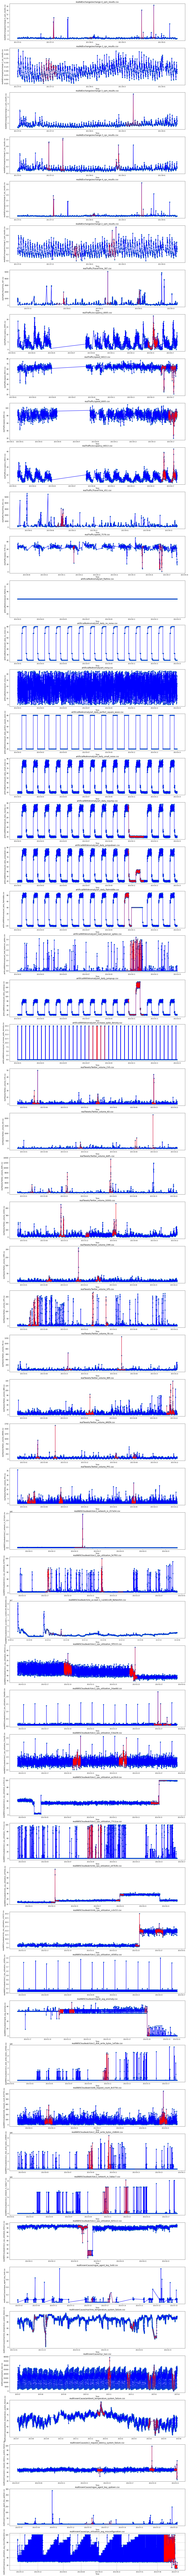

In [30]:
fig = plt.figure(figsize=(20, 300))

num = 0
for key1 in data:
    for key2 in data[key1]:
        num += 1

        y = data[key1][key2]['value']
        x = pd.to_datetime(data[key1][key2]['timestamp'])
        
        ax = fig.add_subplot(csvs_num,1,num)
        
        ax.title.set_text(key1+'/'+key2)
        ax.set_xlabel('Time')
        ax.set_ylabel(key1+'/'+key2)
        plt.setp(ax.get_xticklabels(), size=8)
        ax.plot(x, y, 'b-', linewidth=2)
        i = 0
        
        while data[key1][key2]['interval'][i] != 0:
            bold = data[key1][key2]['interval'][i]
            ax.plot(x[bold], y[bold], 'r-', linewidth=1)
            i += 1
        ax.scatter(x, y)

plt.grid()
plt.show()

**DATA PROCESS**

In [32]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

import pandas as pd
from sklearn.preprocessing import StandardScaler

# class TimeSeriesPreprocessor:
    
#     def __init__(self, dataframe):
#         self.data = dataframe.copy()
#         self.timestamp_col = self.data.columns[0]
#         self.value_col = self.data.columns[1]
        
#     def handle_missing_values(self, strategy="mean"):
#         if strategy == "drop":
#             self.data.dropna(inplace=True)
#         elif strategy == "mean":
#             self.data[self.value_col].fillna(self.data[self.value_col].mean(), inplace=True)
#         elif strategy == "ffill":
#             self.data.fillna(method="ffill", inplace=True)
#         elif strategy == "bfill":
#             self.data.fillna(method="bfill", inplace=True)
#         else:
#             raise ValueError("Invalid strategy selected for handling missing values.")
        
#     def convert_to_datetime(self):
#         self.data[self.timestamp_col] = pd.to_datetime(self.data[self.timestamp_col])
        
#     def resample_data(self, frequency):
#         self.data.set_index(self.timestamp_col, inplace=True)
#         self.data = self.data.resample(frequency).ffill()
        
#     def normalize_data(self):
#         scaler = StandardScaler()
#         self.data[f"{self.value_col}_normalized"] = scaler.fit_transform(self.data[[self.value_col]])
        
#     def feature_engineering(self, window_size=10):
#         self.data['rolling_mean'] = self.data[f"{self.value_col}_normalized"].rolling(window=window_size).mean()
#         self.data['rolling_std'] = self.data[f"{self.value_col}_normalized"].rolling(window=window_size).std()
        
#     def preprocess(self):
#         # Example preprocessing steps
#         self.handle_missing_values()
#         self.convert_to_datetime()
#         self.resample_data('5T')  # Resample to 5 minutes as an example
#         self.normalize_data()
#         self.feature_engineering()
        
#     def get_preprocessed_data(self):
#         return self.data
class TimeSeriesPreprocessor:
    
    def __init__(self, dataframe):
        self.data = dataframe.copy()
        self.timestamp_col = self.data.columns[0]
        self.value_col = self.data.columns[1]
        
    def handle_missing_values(self, strategy="mean"):
        # Introduce the 'validity_flag' column
        self.data['validity_flag'] = 1
        self.data.loc[self.data[self.value_col].isnull(), 'validity_flag'] = 0

        if strategy == "drop":
            self.data.dropna(inplace=True)
        elif strategy == "mean":
            self.data[self.value_col].fillna(self.data[self.value_col].mean(), inplace=True)
        elif strategy == "ffill":
            self.data.fillna(method="ffill", inplace=True)
        elif strategy == "bfill":
            self.data.fillna(method="bfill", inplace=True)
        else:
            raise ValueError("Invalid strategy selected for handling missing values.")
        
    def convert_to_datetime(self):
        self.data[self.timestamp_col] = pd.to_datetime(self.data[self.timestamp_col])
        
    def resample_data(self, frequency):
        self.data.set_index(self.timestamp_col, inplace=True)
        self.data = self.data.resample(frequency).ffill()
        
    def normalize_data(self):
        scaler = StandardScaler()
        self.data[f"{self.value_col}_normalized"] = scaler.fit_transform(self.data[[self.value_col]])
        
    def feature_engineering(self, window_size=10):
        self.data['rolling_mean'] = self.data[f"{self.value_col}_normalized"].rolling(window=window_size).mean()
        self.data['rolling_std'] = self.data[f"{self.value_col}_normalized"].rolling(window=window_size).std()
        
    def preprocess(self):
        # Example preprocessing steps
        self.handle_missing_values()
        self.convert_to_datetime()
        self.resample_data('5T')  # Resample to 5 minutes as an example
        self.normalize_data()
        self.feature_engineering()
        
    def get_preprocessed_data(self):
        return self.data
    
# Usage example:
temp_data = data['realTweets']['Twitter_volume_GOOG.csv']
preprocessor = TimeSeriesPreprocessor(temp_data)
preprocessor.preprocess()
processed_data = preprocessor.get_preprocessed_data()
